# introduction to scikit learn(sklearn)
most use full functions of the beautiful scikit learn library
what we'ar going to cover

0. An end-to-end scikit-learn workflow
1. getting the data ready
2. choose the right estimator/algorithm for our problems
3. fit the model/algorithm and use it to make predictions on our data
4. evaluation a model
5. improve a model
6. save and load a trained model
7. putting it all together

In [1]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 0. An end-to-end scikit learn workflow

In [2]:
#1. get the data ready
import pandas as pd
import numpy as np
heart_disease=pd.read_csv('data/heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
import sklearn
sklearn.show_versions()


System:
    python: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\17ics\anaconda3\python.exe
   machine: Windows-10-10.0.19041-SP0

Python dependencies:
          pip: 20.2.4
   setuptools: 50.3.1.post20201107
      sklearn: 0.23.2
        numpy: 1.19.2
        scipy: 1.5.2
       Cython: 0.29.21
       pandas: 1.1.3
   matplotlib: 3.3.2
       joblib: 0.17.0
threadpoolctl: 2.1.0

Built with OpenMP: True


In [4]:
# create x (featuers matrix) (hum ko es data set se ye pata krna hai ki kis ko bimare hai)
x=heart_disease.drop('target',axis=1)
# create y (labels)
y=heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [5]:
# warning ko ignore ki liye krte hai 
# import warnings
# warnings.filterwarnings('ignore')

In [6]:
# 2. choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
# clf = RandomForestClassifier(n_estimators=20) # hum se me n_estimator add kr skte hai 
# we'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [7]:
# 3. fit the model to the training data
from sklearn.model_selection import train_test_split
##.8 to training and .2 for testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [8]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [9]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2
217,63,1,0,130,330,1,0,132,1,1.8,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,65,0,0,150,225,0,0,114,0,1.0,1,3,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3


In [10]:
# make prediction
# y_label = clf.predict(np.array[1,2,3,4]) # data is not formated like dimension

In [11]:
y_preds = clf.predict(x_test)
y_preds

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

In [12]:
y_test

216    0
232    0
66     1
12     1
180    0
      ..
291    0
188    0
207    0
49     1
72     1
Name: target, Length: 61, dtype: int64

In [13]:
#4. Evaluate the model on the training data and test data
clf.score(x_train,y_train)

1.0

In [14]:
clf.score(x_test,y_test)

0.819672131147541

In [15]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.82      0.64      0.72        22
           1       0.82      0.92      0.87        39

    accuracy                           0.82        61
   macro avg       0.82      0.78      0.79        61
weighted avg       0.82      0.82      0.81        61



In [16]:
confusion_matrix(y_test,y_preds)

array([[14,  8],
       [ 3, 36]], dtype=int64)

In [17]:
accuracy_score(y_test,y_preds)

0.819672131147541

In [18]:
#5. improve a model
# try diffrent amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"trying model with {i} estimators")
    clf=RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"model accuracy on test set:{clf.score(x_test,y_test) *100:.2f}%")
    print("")

trying model with 10 estimators
model accuracy on test set:81.97%

trying model with 20 estimators
model accuracy on test set:90.16%

trying model with 30 estimators
model accuracy on test set:83.61%

trying model with 40 estimators
model accuracy on test set:86.89%

trying model with 50 estimators
model accuracy on test set:86.89%

trying model with 60 estimators
model accuracy on test set:86.89%

trying model with 70 estimators
model accuracy on test set:86.89%

trying model with 80 estimators
model accuracy on test set:86.89%

trying model with 90 estimators
model accuracy on test set:86.89%



In [19]:
# 6. save a model  and load it 
import pickle
pickle.dump(clf,open("random_foreset_model_1.pk1","wb"))

In [20]:
loaded_model = pickle.load(open("random_foreset_model_1.pk1","rb"))
loaded_model.score(x_test,y_test)

0.8688524590163934

  putting  all together
## 1. getting our data ready to be used with machine learning
three main thins we have to do:
1. split the data into features and labels (usually 'x' & 'y')
2. filling (also called imputting) or disregarding missing values
3. convert non-numerical values to numerical values (also called feature encoding)

In [21]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
x = heart_disease.drop('target',axis=1)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [23]:
y = heart_disease['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [24]:
# split data into training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x , y, test_size=0.2)

In [25]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [26]:
x.shape[0] *.8

242.4

In [27]:
242 + 61

303

In [28]:
len(heart_disease)

303

## 1.1 make sure it's all numerical

In [29]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [30]:
len(car_sales)

1000

In [31]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [32]:
# split into x/y
x= car_sales.drop('Price',axis=1)
y= car_sales['Price']

# split into training and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [33]:
# build machine learning model
from sklearn.ensemble import RandomForestRegressor
# regressor number predicton ki liye hota hai // similer like classification

model = RandomForestRegressor()
# model.fit(x_train,y_train)  # ValueError: could not convert string to float: 'Toyota'
# model.score(x_test,y_test)

In [34]:
# turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],
                               remainder = "passthrough")
transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [35]:
# pd.DataFrame(transformed_x)

In [36]:
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
# dummies

In [37]:
# let refit model
np.random.seed(42)
X_train,X_test,Y_train,Y_test=train_test_split(transformed_x,y,test_size=0.2)
model.fit(X_train,Y_train)

RandomForestRegressor()

In [38]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [39]:
model.score(X_test,Y_test)

0.3235867221569877

## what if there were missing values?
1. fill them with some value(also known as imputation).
2. remove the samples with missing data altogether

In [40]:
# import car sales missing data
car_sales_missing=pd.read_csv('data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [41]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [42]:
# create x & y
x=car_sales_missing.drop('Price',axis=1)
y=car_sales_missing['Price']

In [43]:
# turn the categories into numbers
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

# categorical_features = ['Make','Colour','Doors']
# one_hot = OneHotEncoder()
# transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],
#                                remainder = "passthrough")
# transformed_x = transformer.fit_transform(x)
# transformed_x

In [44]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


# option 1: fill missing data with pandas

In [45]:
car_sales_missing['Doors'].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [46]:
# fill the "Make" column
car_sales_missing['Make'].fillna('missing',inplace=True)

# fill the "color"
car_sales_missing['Colour'].fillna('missing',inplace=True)

# fill the "Odometer (KM)" column

car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(),inplace=True)

# fill the 'door' column
car_sales_missing['Doors'].fillna(4,inplace=True)

In [47]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [48]:
# remove rows with missing price values
car_sales_missing.dropna(inplace=True)

In [49]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [50]:
len(car_sales_missing)

950

In [51]:
x = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

In [52]:
# turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],
                               remainder = "passthrough")
transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

## option 2 : fill missing value with scikit-learn


In [53]:
car_sales_missing= pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [54]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [55]:
# drop the row with no labels
car_sales_missing.dropna(subset=['Price'],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [56]:
# split into x,y
x= car_sales_missing.drop('Price',axis=1)
y=car_sales_missing['Price']

In [57]:
# fill mising values with scikit learn
# from sklearn.impute import SimpleImputer


In [58]:
# fill the "Make" column
car_sales_missing['Make'].fillna('missing',inplace=True)

# fill the "color"
car_sales_missing['Colour'].fillna('missing',inplace=True)

# fill the "Odometer (KM)" column

car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(),inplace=True)

# fill the 'door' column
car_sales_missing['Doors'].fillna(4,inplace=True)

In [59]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [60]:
# turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],
                               remainder = "passthrough")
transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [61]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0,4001.0


In [62]:
# now fit the model 
# lets fit model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(transformed_x,y , test_size=0.2)
model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9998421058539825

In [63]:
len(car_sales_missing)

950

## 2 . choosing the right estimator/algorithm for our problem
scikit-learn uses estimator as another term for machine learning model or algorithm

* classsification - prediction whether a sample is one thing or another(yahi nhi to kuch aur)
* regression - prediction a number


step 1 - check the scikit-learn machine learning map...https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [64]:
# import boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [65]:
boston_df = pd.DataFrame(boston['data'],columns=boston['feature_names'])
boston_df['target'] = pd.Series(boston['target'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [66]:
# hwo many samples
len(boston_df)

506

In [67]:
# let's try the ridge regression model  # some 
from sklearn.linear_model import Ridge

# setup random seed
np.random.seed(42)

# create the data
x = boston_df.drop('target',axis=1)
y= boston_df['target']

# split into train and testing set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# instantiate ridge model
model = Ridge()
model.fit(x_train,y_train)

# check the score of the ridge model on test data

model.score(x_test,y_test)


0.6662221670168519

how do we imporve this score?

what if ridge wasn't working?

back to the  machine leaning map https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html


In [68]:
# let's try random forest regressor
from sklearn.ensemble import RandomForestClassifier

# setup random seed 
np.random.seed(42)

# create the data
x=boston_df.drop('target',axis=1)
y=boston_df['target']

# split the data 
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# instatiate random forest regresssor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)

RandomForestRegressor()

In [69]:
#evaluation the random forest regressor
rf.score(x_test,y_test)

0.8922527442109116

In [70]:
# check the ridge model again
model.score(x_test,y_test)

0.6662221670168519

## 2.2 chosing and estimator for classification problem
let's go the map ... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [71]:
heart_disease = pd.read_csv('data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [72]:
len(heart_disease)

303

consulting the map and it easy to try linearSVC

In [73]:
# import the linear estimator class
from sklearn.svm import LinearSVC

# seed 
np.random.seed(42)

# make the data
x = heart_disease.drop('target',axis=1)
y = heart_disease['target']

# split data to training and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# instantiate LinearSVC
clf = LinearSVC(max_iter=1000)
clf.fit(x_train,y_train)

# evaluate the linearSVC
clf.score(x_test,y_test)

C:\Users\17ics\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [74]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [75]:
# import the randomforest classifier estimator class
from sklearn.ensemble import RandomForestClassifier

# seed 
np.random.seed(42)

# make the data
x = heart_disease.drop('target',axis=1)
y = heart_disease['target']

# split data to training and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# instantiate LinearSVC
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)

# evaluate the linearSVC
clf.score(x_test,y_test)

0.8524590163934426

Tidbit:
1. if you have structure data ,used ensemble methods
2. if you have unstructure data , use deep learning or transfer learning

In [76]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## fit the model/algorithm on our data and use it to make predictions

## 3.1 fitting the model to the data

* `x` =  features,features variables,data
* `y` = labels ,target,target variables

In [77]:
# import the randomforest classifier estimator class
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split as split

# seed 
np.random.seed(42)

# make the data
x = heart_disease.drop('target',axis=1)
y = heart_disease['target']

# split data to training and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# instantiate LinearSVC
clf = RandomForestClassifier(n_estimators=1000)
clf.fit(x_train,y_train)

# evaluate the linearSVC
clf.score(x_test,y_test)

0.8688524590163934

In [78]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [79]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

###  3.2 make prediction using a machine learning model
1. `predict()` 
2. `predict_proba()`

In [80]:
# using a trained model to make predictions

x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [81]:
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [82]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [83]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [84]:
# compare prediction to truth labels to evaluate the model
y_preds =  clf.predict(x_test)
np.mean(y_preds == y_test)

0.8688524590163934

In [85]:
clf.score(x_test,y_test)

0.8688524590163934

In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8688524590163934

## make predictions with `predict_proba()`


In [87]:
# predict_proba() returns probabilites of classification label
clf.predict_proba(x_test[:5])

array([[0.894, 0.106],
       [0.435, 0.565],
       [0.455, 0.545],
       [0.871, 0.129],
       [0.23 , 0.77 ]])

In [88]:
# let's predict() on same data ....
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [89]:
x_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


`predict()` can also be used for regression models.

In [90]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [91]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

x= boston_df.drop('target',axis=1)
y=boston_df['target']

x_train,x_test,y_train,y_test=  train_test_split(x,y,test_size=0.2)


model = RandomForestRegressor()
model.fit(x_train,y_train)

y_preds = model.predict(x_test)

In [92]:
y_preds[0:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [93]:
np.array(y_test[0:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [94]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

2.136382352941176

## 4. Evaluating a machine learning model

there there ways to evaluate scikit-learn model/estimators
1. estimator `score` method
2. the `scoring` parameter
3. problem-specific metric functions.

### evaluation `score` method

In [95]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop('target',axis=1)
y = heart_disease['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [96]:
clf.score(x_train,y_train)

1.0

In [97]:
clf.score(x_test,y_test)

0.8524590163934426

let's do the same but for regression..

In [98]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x= boston_df.drop('target',axis=1)
y=boston_df['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


model = RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)

RandomForestRegressor()

In [99]:
model.score(x_test,y_test)

0.8654448653350507

4.2 evaulation a model using the `scoring` parameter

In [100]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop('target',axis=1)
y = heart_disease['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)

RandomForestClassifier()

In [101]:
# by default model ko jb train krte hai to training data ki 5 set use hota hai
# use 5 ka evaulation krta hai ye `cross_val_score` cv=5(default)
#cv=data ki accuracy kitni split me hoge 
cross_val_score(clf,x,y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [102]:
np.random.seed(42)

# single training and test split score
clf_single_score = clf.score(x_test,y_test)

# take the mean of 5 fold cross-validation acrose
clf_crosss_val_score = np.mean(cross_val_score(clf,x,y,cv=5))

# compare the two
clf_single_score,clf_crosss_val_score


(0.8524590163934426, 0.8248087431693989)

In [103]:
# default scoring parameter of classification  =  mean accuracy
# clf.score()

In [104]:
# scoring parameter set to None by default
cross_val_score(clf,x,y,cv=5,scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 classification model evaluation metrics
1. Accuracy
2. area under Roc curve
3. confusion matrix
4. classification report
### accuracy

In [105]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [106]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop('target',axis=1)
y = heart_disease['target']

clf = RandomForestClassifier(n_estimators=100)
cross_accuracy = cross_val_score(clf,x,y,cv=5)

In [107]:
cross_accuracy

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [108]:
np.mean(cross_accuracy)

0.8248087431693989

In [109]:
print(f"Hear Disease classification cross-validated-accuracy: {np.mean(cross_accuracy) *100:.2f}%")

Hear Disease classification cross-validated-accuracy: 82.48%


**Area under the reciver operating characteristic curve(Auc/Roc)**
* area under curve(auc)
* roc curve

**roc curve are compare of model's true positive rate(tpr) vs model false positive**

* true positive  = model predict 1 when truth is 1
* false positive = model predict 1 when truth is 0
* true negative = model predict 0 when truth 0
* false negative = model predict 0 when truth 1

In [110]:
from  sklearn.metrics import roc_curve
# fit the classifier
clf.fit(x_train,y_train)
# make prediction with probabilities
y_probs =  clf.predict_proba(x_test)
y_probs[:10],len(y_probs)

(array([[0.87, 0.13],
        [0.41, 0.59],
        [0.45, 0.55],
        [0.89, 0.11],
        [0.19, 0.81],
        [0.14, 0.86],
        [0.4 , 0.6 ],
        [0.96, 0.04],
        [1.  , 0.  ],
        [0.43, 0.57]]),
 61)

In [111]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.13, 0.59, 0.55, 0.11, 0.81, 0.86, 0.6 , 0.04, 0.  , 0.57])

In [112]:
# calculate fpr,tpr and thresholds
fpr,tpr,thresholds = roc_curve(y_test,y_probs_positive)
# check false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.13793103, 0.13793103, 0.17241379, 0.17241379,
       0.17241379, 0.17241379, 0.20689655, 0.20689655, 0.24137931,
       0.34482759, 0.4137931 , 0.51724138, 0.5862069 , 0.65517241,
       0.65517241, 0.72413793, 0.82758621, 0.89655172, 0.93103448,
       1.        ])

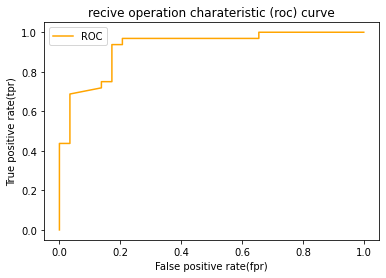

In [113]:
# create a function for plotting roc curves
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
    """"
    plots a roc curve given the false positive rate(fpr)
    and true positive rate (tpr) of a model
    """
    # plot roc curve
    plt.plot(fpr,tpr,color="orange",label="ROC")
    
    # plot line with no predictive power(baseline)
#     plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")
    
    
    # customize the plot
    plt.xlabel("False positive rate(fpr)")
    plt.ylabel("True positive rate(tpr)")
    plt.title("recive operation charateristic (roc) curve")
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)    

In [114]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)

0.9251077586206896

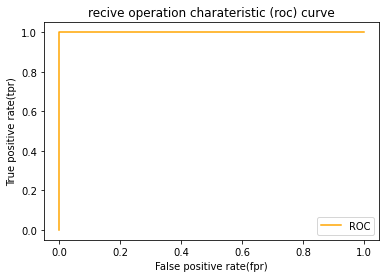

In [115]:
# prefect roc / auc score
fpr,tpr,thresholds = roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [116]:
# perfect auc score
roc_auc_score(y_test,y_test)

1.0

**confusion matrix**

a confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was support to predict.

In essence , giving you an idea of where the model is getting confused

In [117]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(x_test)

confusion_matrix(y_test,y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [118]:
# visualize confusion matrix with pd.crosstababs
pd.crosstab(y_test,y_preds,rownames=['Actual labels'],colnames=['Predicted labels'])

Predicted labels,0,1
Actual labels,,
0,24,5
1,4,28


In [119]:
24+5+3+29

61

In [120]:
len(y_preds)

61

In [121]:
# from sklearn.metrics import plot_confusion_matrix
# plot_confusion_matrix(clf, X_test, y_test)  
# plt.show()

**classification Reprot**

In [122]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



###  https://scikit-learn.org/stable/modules/model_evaluation.html

### regression model evaluation matrics
https://scikit-learn.org/stable/modules/model_evaluation.html

1.R^2 (pronounced r-square) or cofficient of determination

2.Mean absolute error(MAE)

3.Mean square error(MSE)


### finally using the scoring parameter

In [123]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x = heart_disease.drop('target',axis=1)
y = heart_disease['target']
clf = RandomForestClassifier(n_estimators=100)

In [124]:
np.random.seed(42)
cv_acc = cross_val_score(clf,x,y,cv=5,scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [125]:
# cross-validator accuracy
print(f'the cross-validator accuracy is:{np.mean(cv_acc)*100:.2f}%')

the cross-validator accuracy is:82.48%


## 5. Improve a  model

first predictions= baseline predictions . first model = baseline model
from a data perspective:
* could we collect more data ? (genrally more data , the better)
* could we imporve our data?

from a model perspective:

* is there a better model we could use?
* could we imporve the current model?

hyperparameters vs. Parameters

* parameter = model find these pattern in data
* hyperparameter = setting on a model you can adjust to(potential) imporve its ability to find patterns


three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with gridsearchCV

In [126]:
from sklearn.ensemble import RandomForestClassifier
clf= RandomForestClassifier()

In [127]:
# clf.get_params()

### hyperparamet by hand
let's 3 sets,training,validation and test.

In [128]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

we are going to try  and adjust :

* `max_depth`
* `max_featurs`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [129]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
def evaluate_preds(y_true,y_preds):
    """
    perform evaluation comparison on y_true labels vs. y_preds labels
    on a classification
    """
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1=f1_score(y_true,y_preds)
    metrics_dict = {'accuracy':round(accuracy,2),
                    'precision':round(precision,2),
                    'recall':round(recall,2),
                    'f1':round(f1,2)
                   }
    print(f"Acc: {accuracy*100:.2f}%")
    print(f"Precision: {precision*100:.2f}%")
    print(f"Recall: {recall*100:.2f}%")
    print(f"f1: {f1*100:.2f}%")
    
    return metrics_dict

In [138]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

#split data in x & y

x = heart_disease_shuffled.drop('target',axis=1)
y = heart_disease_shuffled['target']

# split the data into train,valid,test
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
x_train,y_train = x[:train_split],y[:train_split]
x_valid,y_valid= x[train_split:valid_split],y[train_split:valid_split]
x_test,y_test = x[valid_split:],y[:valid_split]
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

# make baseline predictions
y_preds = clf.predict(x_valid)

# evaluation the classification on validation set
baseline_matrics = evaluate_preds(y_valid,y_preds)

Acc: 82.22%
Precision: 81.48%
Recall: 88.00%
f1: 84.62%


In [139]:
np.random.seed(42)
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(x_train,y_train)

# make prediction
y_pred_2 = clf_2.predict(x_valid)

# evaluation the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid,y_pred_2)

Acc: 82.22%
Precision: 84.00%
Recall: 84.00%
f1: 84.00%


### hyperparameter tuning with Randomized searchCV

In [159]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators":[10,100,200,500,1000,1200],
        "max_depth":[None,5,10,20,30],
        "max_features":['auto','sqrt'],
        "min_samples_split":[2,4,6],
        "min_samples_leaf":[1,2,4]
       }

np.random.seed(42)

# split into x,y

x= heart_disease_shuffled.drop('target',axis=1)
y= heart_disease_shuffled['target']

# split into train and set test sets

x_train,x_test,y_train,y_test,= train_test_split(x,y,test_size=0.2)

#instantiate randomforestclassifier
clf = RandomForestClassifier(n_jobs=1)

#set randomizedSearchCV
rs_clf=RandomizedSearchCV(estimator=clf,
                          param_distributions=grid,
                          n_iter=10,   # number of models to try
                          cv=5,
                          verbose=2
                         )

# fit the randomizedsearchCv version of clf
rs_clf.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samp

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.4s
[CV] n_estimators=1000, min_samples_split=4, min_s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   24.6s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [160]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [149]:
# make prediction with the best hyperparameters
rs_clf_preds =  rs_clf.predict(x_test)

# evaluate the predictions
rs_metrics = evaluate_preds(y_test,rs_clf_preds)

Acc: 81.97%
Precision: 75.76%
Recall: 89.29%
f1: 81.97%


## 5.3 hyperparameter tuning with gridSearchCv
like bruteforce

In [150]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [151]:
6*5*2*3*3 #iteration

540

In [162]:
# jo hum ko randamize se best parapeter mila hai us ko use kro

grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto','sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]
         }

In [166]:
3*1*2*1*2*5 # 5 cross validator

60

In [169]:
from sklearn.model_selection import GridSearchCV,train_test_split

np.random.seed(42)

# split into x,y

x= heart_disease_shuffled.drop('target',axis=1)
y= heart_disease_shuffled['target']

# split into train and set test sets

x_train,x_test,y_train,y_test,= train_test_split(x,y,test_size=0.2)

#instantiate randomforestclassifier
clf = RandomForestClassifier(n_jobs=1)

#set GridSarchCv
gs_clf=GridSearchCV(estimator=clf,
                          param_grid=grid_2,
                          cv=5,
                          verbose=2
                         )

# fit the gridsearchCv version of clf
gs_clf.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.3s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   22.7s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [170]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [171]:
gs_y_preds=gs_clf.predict(x_test)

# evaluate the predications
gs_matrics = evaluate_preds(y_test,gs_y_preds)

Acc: 78.69%
Precision: 74.19%
Recall: 82.14%
f1: 77.97%
